In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
path = '/home/whoami/Programming/Python/cs229-assignments/machine-learning-ex1/ex1'
data1 = path + '/ex1data1.txt'
data2 = path + '/ex1data2.txt'

# Plot Data

In [3]:
def plot_data(x, y):
    # ===================== Your Code Here =====================
    # Instructions : Plot the training data into a figure using the matplotlib.pyplot
    #                using the "plt.scatter" function. Set the axis labels using
    #                "plt.xlabel" and "plt.ylabel". Assume the population and revenue data
    #                have been passed in as the x and y.

    # Hint : You can use the 'marker' parameter in the "plt.scatter" function to change the marker type (e.g. "x", "o").
    #        Furthermore, you can change the color of markers with 'c' parameter.


    # ===========================================================
    plt.scatter(x, y, marker='x')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# Compute Cost Function

In [4]:
def compute_cost(X, y, theta):
    # Initialize some useful values
    m = y.size
    cost = 0

    # ===================== Your Code Here =====================
    # Instructions : Compute the cost of a particular choice of theta.
    #                You should set the variable "cost" to the correct value.
    

    # ==========================================================
    cost = np.sum((np.dot(X, theta) - y) ** 2) / (2 * m)
    return cost

# Gradient Descent 

In [5]:
def gradient_descent(X, y, theta, alpha, num_iters):
    # Initialize some useful values
    m = y.size
    J_history = np.zeros(num_iters)

    for i in range(0, num_iters):
        # ===================== Your Code Here =====================
        # Instructions : Perform a single gradient step on the parameter vector theta
        #
        # Hint: X.shape = (97, 2), y.shape = (97, ), theta.shape = (2, )


        # ===========================================================
        # Save the cost every iteration
        error = np.dot(X, theta).flatten() - y
        theta = theta - (alpha/m) * np.sum(X*error[:, np.newaxis], 0) 
        J_history[i] = compute_cost(X, y, theta)
    

    return theta, J_history


def gradient_descent_multi(X, y, theta, alpha, num_iters):
    # Initialize some useful values
    m = y.size
    J_history = np.zeros(num_iters)

    for i in range(0, num_iters):
        # ===================== Your Code Here =====================
        # Instructions : Perform a single gradient step on the parameter vector theta
        #


        # ===========================================================
        # Save the cost every iteration
        error = np.dot(X, theta).flatten() - y 
        theta -= (alpha / m ) * np.sum(X*error[:, np.newaxis], 0) 
        J_history[i] = compute_cost(X, y, theta)

    return theta, J_history

# Normal Equation

In [6]:
def normal_eqn(X, y):
    theta = np.zeros((X.shape[1], 1))

    # ===================== Your Code Here =====================
    # Instructions : Complete the code to compute the closed form solution
    #                to linear regression and put the result in theta
    #
    Xt = np.transpose(X)
    theta = np.linalg.pinv(Xt.dot(X)).dot(Xt).dot(y)

    return theta


# Feature Normalization 

In [7]:
def feature_normalize(X):
    # You need to set these values correctly
    n = X.shape[1]  # the number of features
    X_norm = X
    mu = np.zeros(n)        # mean 
    sigma = np.zeros(n)     # standard deviation 

    # ===================== Your Code Here =====================
    # Instructions : First, for each feature dimension, compute the mean
    #                of the feature and subtract it from the dataset,
    #                storing the mean value in mu. Next, compute the
    #                standard deviation of each feature and divide
    #                each feature by its standard deviation, storing
    #                the standard deviation in sigma
    #
    #                Note that X is a 2D array where each column is a
    #                feature and each row is an example. You need
    #                to perform the normalization separately for
    #                each feature.
    #
    # Hint: You might find the 'np.mean' and 'np.std' functions useful.
    #       To get the same result as Octave 'std', use np.std(X, 0, ddof=1)
    #



    # ===========================================================
    mu = np.mean(X, 0)
    sigma = np.std(X, 0, ddof=1)
    X_norm = (X - mu)/sigma


    return X_norm, mu, sigma

# Ex1 Python File Run

Plotting Data...


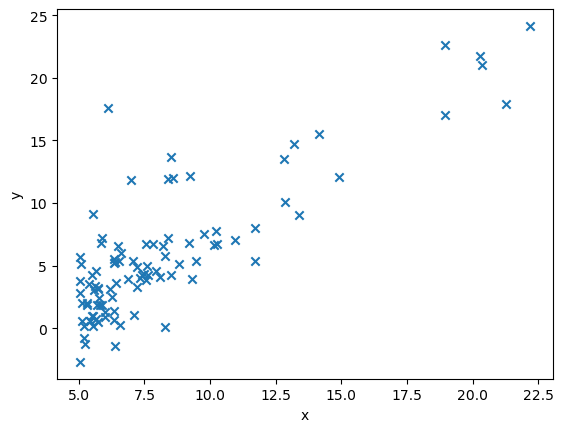

In [8]:
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import axes3d, Axes3D

# ===================== Part 1: Plotting =====================
print('Plotting Data...')
data = np.loadtxt(data1, delimiter=',', usecols=(0, 1))
X = data[:, 0]
y = data[:, 1]
m = y.size

plt.ion()
plt.figure(0)
plot_data(X, y)

# input('Program paused. Press ENTER to continue')


Running Gradient Descent...
Initial cost : 32.072733877455676 (This value should be about 32.07)
Theta found by gradient descent: [-3.63029144  1.16636235]
For population = 35,000, we predict a profit of 4519.768 (This value should be about 4519.77)
For population = 70,000, we predict a profit of 45342.450 (This value should be about 45342.45)


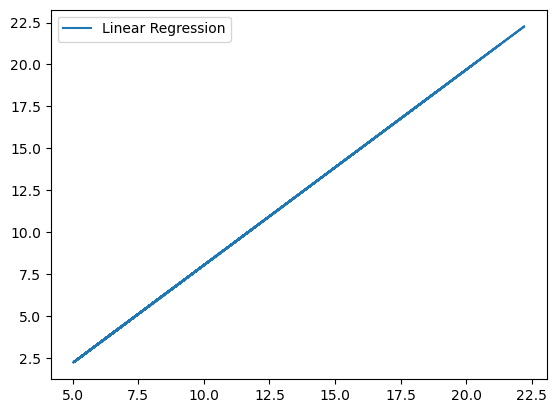

In [9]:
# ===================== Part 2: Gradient descent =====================
print('Running Gradient Descent...')

X = np.c_[np.ones(m), X]  # Add a column of ones to X
theta = np.zeros(2)  # initialize fitting parameters

# Some gradient descent settings
iterations = 1500
alpha = 0.01

# Compute and display initial cost
print('Initial cost : ' + str(compute_cost(X, y, theta)) + ' (This value should be about 32.07)')

theta, J_history = gradient_descent(X, y, theta, alpha, iterations)

print('Theta found by gradient descent: ' + str(theta.reshape(2)))


# Plot the linear fit
plt.figure(0)
line1, = plt.plot(X[:, 1], np.dot(X, theta), label='Linear Regression')
plt.legend(handles=[line1])

# input('Program paused. Press ENTER to continue')

# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot(np.array([1, 3.5]), theta)
print('For population = 35,000, we predict a profit of {:0.3f} (This value should be about 4519.77)'.format(predict1*10000))
predict2 = np.dot(np.array([1, 7]), theta)
print('For population = 70,000, we predict a profit of {:0.3f} (This value should be about 45342.45)'.format(predict2*10000))

# input('Program paused. Press ENTER to continue')

Visualizing J(theta0, theta1) ...


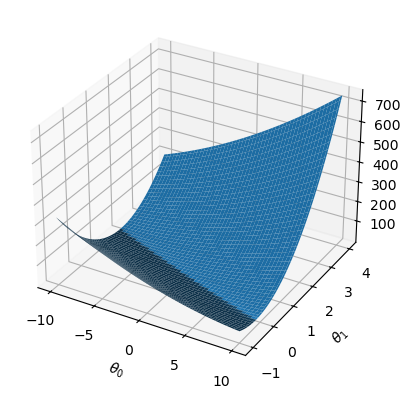

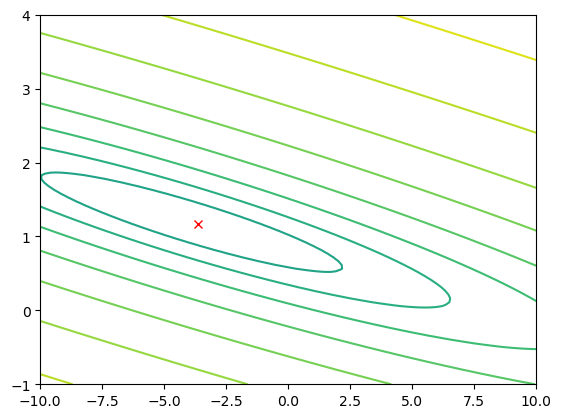

In [10]:
# ===================== Part 3: Visualizing J(theta0, theta1) =====================
print('Visualizing J(theta0, theta1) ...')

theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

xs, ys = np.meshgrid(theta0_vals, theta1_vals)
J_vals = np.zeros(xs.shape)

# Fill out J_vals
for i in range(0, theta0_vals.size):
    for j in range(0, theta1_vals.size):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i][j] = compute_cost(X, y, t)

J_vals = np.transpose(J_vals)

fig1 = plt.figure(1)
ax = fig1.add_subplot(projection = '3d')
ax.plot_surface(xs, ys, J_vals)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')

plt.figure(2)
lvls = np.logspace(-2, 3, 20)
plt.contour(xs, ys, J_vals, levels=lvls, norm=LogNorm())
plt.plot(theta[0], theta[1], c='r', marker="x")

# input('ex1 Finished. Press ENTER to exit')


# Ex_multi 

In [11]:
plt.ion()

# ===================== Part 1: Feature Normalization =====================
print('Loading Data...')
data = np.loadtxt(data2, delimiter=',', dtype=np.int64)
X = data[:, 0:2]
y = data[:, 2]
m = y.size

# Print out some data points
print('First 10 examples from the dataset: ')
for i in range(0, 10):
    print('x = {}, y = {}'.format(X[i], y[i]))

# input('Program paused. Press ENTER to continue')

# Scale features and set them to zero mean
print('Normalizing Features ...')

X, mu, sigma = feature_normalize(X)
X = np.c_[np.ones(m), X]  # Add a column of ones to X




Loading Data...
First 10 examples from the dataset: 
x = [2104    3], y = 399900
x = [1600    3], y = 329900
x = [2400    3], y = 369000
x = [1416    2], y = 232000
x = [3000    4], y = 539900
x = [1985    4], y = 299900
x = [1534    3], y = 314900
x = [1427    3], y = 198999
x = [1380    3], y = 212000
x = [1494    3], y = 242500
Normalizing Features ...


Running gradient descent ...
Theta computed from gradient descent : 
[340410.91897274 110308.11337059  -6326.5381075 ]
Predicted price of a 1650 sq-ft, 3 br house (using gradient descent) : 293149.994


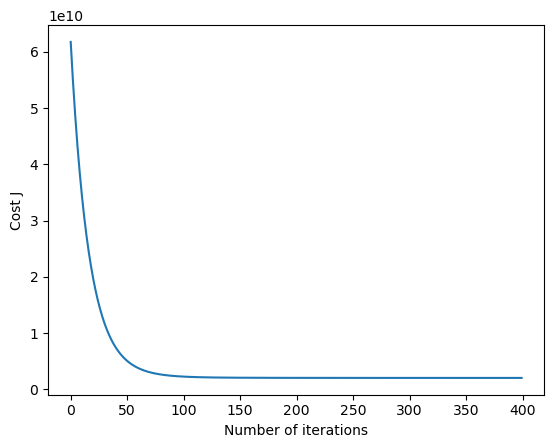

In [12]:
# ===================== Part 2: Gradient Descent =====================

# ===================== Your Code Here =====================
# Instructions : We have provided you with the following starter
#                code that runs gradient descent with a particular
#                learning rate (alpha).
#
#                Your task is to first make sure that your functions -
#                computeCost and gradientDescent already work with
#                this starter code and support multiple variables.
#
#                After that, try running gradient descent with
#                different values of alpha and see which one gives
#                you the best result.
#
#                Finally, you should complete the code at the end
#                to predict the price of a 1650 sq-ft, 3 br house.
#
# Hint: At prediction, make sure you do the same feature normalization.
#



print('Running gradient descent ...')

# Choose some alpha value
alpha = 0.03
num_iters = 400

# Init theta and Run Gradient Descent
theta = np.zeros(3)
theta, J_history = gradient_descent_multi(X, y, theta, alpha, num_iters)

# Plot the convergence graph
plt.figure()
plt.plot(np.arange(J_history.size), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

# Display gradient descent's result
print('Theta computed from gradient descent : \n{}'.format(theta))

# Estimate the price of a 1650 sq-ft, 3 br house
# ===================== Your Code Here =====================
# Recall that the first column of X is all-ones. Thus, it does
# not need to be normalized.
price = 0  # You should change this
predict = np.array([1650, 3])
predict = (predict - mu) / sigma
predict = np.r_[(1, predict)]
price = np.dot(predict, theta)


# ==========================================================

print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent) : {:0.3f}'.format(price))

# input('Program paused. Press ENTER to continue')

In [13]:

# ===================== Part 3: Normal Equations =====================

print('Solving with normal equations ...')

# ===================== Your Code Here =====================
# Instructions : The following code computes the closed form
#                solution for linear regression using the normal
#                equations. You should complete the code in
#                normalEqn.py
#
#                After doing so, you should complete this code
#                to predict the price of a 1650 sq-ft, 3 br house.
#

# Load data
data = np.loadtxt('ex1data2.txt', delimiter=',', dtype=np.int64)
X = data[:, 0:2]
y = data[:, 2]
m = y.size

# Add intercept term to X
X = np.c_[np.ones(m), X]

theta = normal_eqn(X, y)

# Display normal equation's result
print('Theta computed from the normal equations : \n{}'.format(theta))

# Estimate the price of a 1650 sq-ft, 3 br house
# ===================== Your Code Here =====================
price = 0  # You should change this
predict = np.array([1, 1650, 3])
price = np.dot(predict, theta)

# ==========================================================

print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations) : {:0.3f}'.format(price))

# input('ex1_multi Finished. Press ENTER to exit')


Solving with normal equations ...
Theta computed from the normal equations : 
[89597.90954435   139.21067402 -8738.01911278]
Predicted price of a 1650 sq-ft, 3 br house (using normal equations) : 293081.464
